# WUM - Praca domowa 3
Autor: Franciszek Saliński

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from PAM_algorithm import cluster_PAM

sns.set(style="whitegrid")

# Set random seed
import random as rnd
rnd.seed(42)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

data = pd.read_csv('327217_data.csv')
my_X, my_y = data.drop('y', axis=1), data['y']

## 1. Opis zadania

Zadanie polega na implementacji algorytmu PAM (Partitioning Around Medoids) oraz porównaniu jego działania z algorytmem K-średnich.

## 2. Zbiory danych

### 2.1. Zbiór danych z zadania

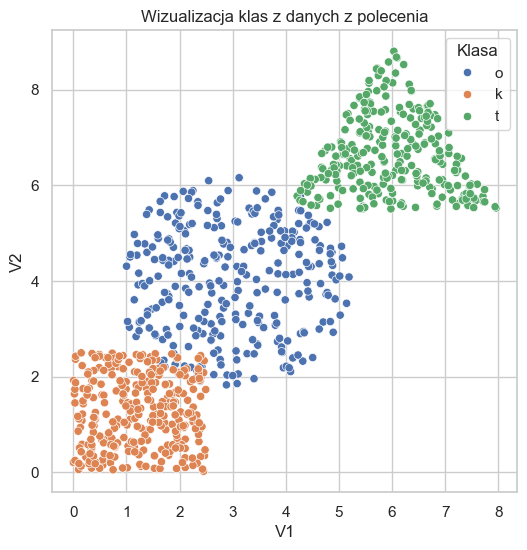

In [3]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=X['V1'], y=X['V2'], hue=y['Klasa'])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Wizualizacja klas z danych z polecenia')
plt.show()

### 2.2. Wygenerowany zbiór danych

Do wygenerowania danych użyłem wbudowanej funkcji `make_blobs` z biblioteki `sklearn.datasets`. Dobrałem parametry tak, aby zbiór danych był ciekawy oraz aby klasteryzacja nie była trywialna. Chciałem aby klastrów było więcej niż w zbiorze z zadania, dlatego postawiłem na 7. Dobrałem szum tak, aby klastry były jednocześnie odseparowane, ale nie w oczywisty sposób (`noise` = 0.8).

Dane prezentują się następująco:

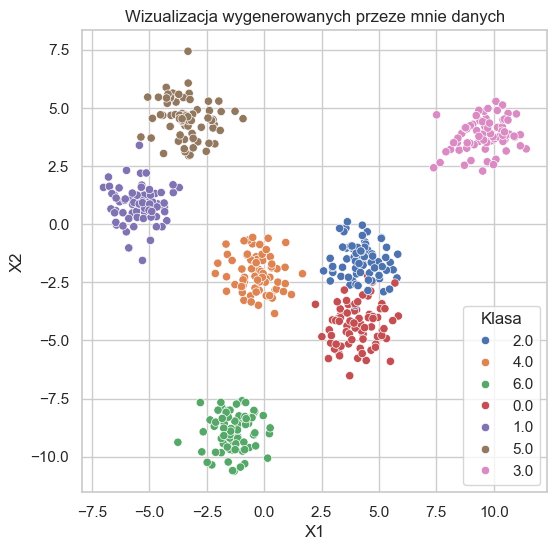

In [4]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=my_y.astype(str))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Wizualizacja wygenerowanych przeze mnie danych')
plt.legend(loc='lower right', title='Klasa')
plt.show()

## 3. Eksperymenty

### 3.1. Test działania dla dobrej liczby klastrów
#### 3.1.1. Zbiór danych z zadania

Text(0, 0.5, 'V2')

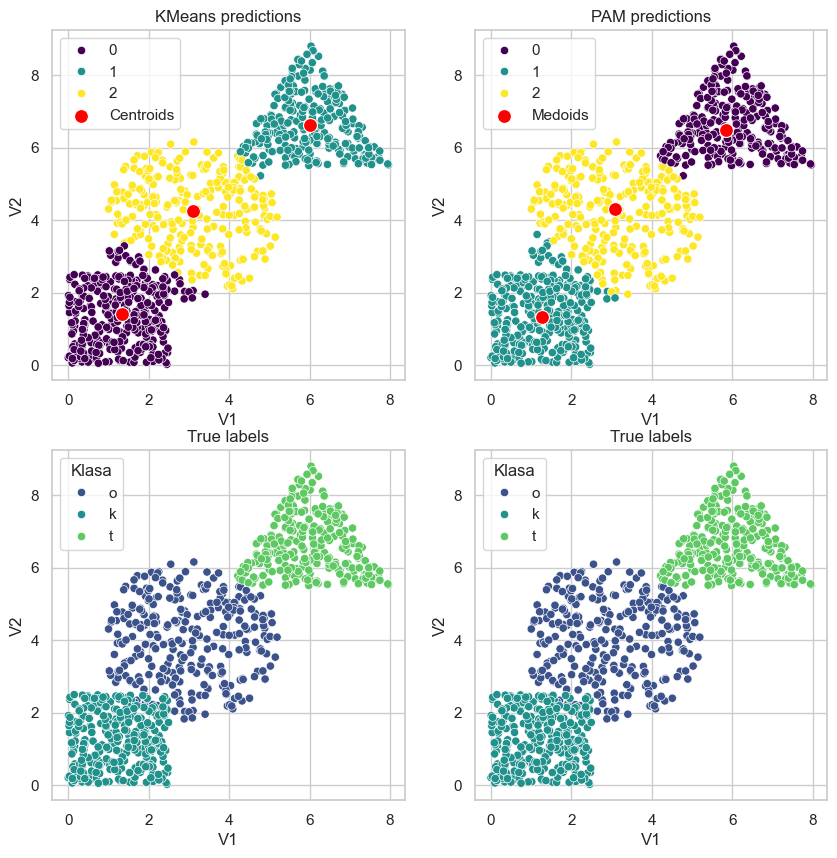

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# KMeans predictions
kmeans = KMeans(n_clusters=3, random_state=42, n_init=5).fit(X)
# PAM predictions
PAM = cluster_PAM(X.to_numpy(), k=3, n_of_runs=5)

sns.scatterplot(x=X['V1'], y=X['V2'], hue=kmeans.labels_, ax=ax[0, 0], palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                ax=ax[0, 0], color='red', s=100, label='Centroids')
ax[0, 0].set_title('KMeans predictions')
ax[0, 0].set_xlabel('V1')
ax[0, 0].set_ylabel('V2')

sns.scatterplot(x=X['V1'], y=X['V2'], hue=PAM[1], ax=ax[0, 1], palette='viridis')
sns.scatterplot(x=PAM[0][:, 0], y=PAM[0][:, 1],
                ax=ax[0, 1], color='red', s=100, label='Medoids')
ax[0, 1].set_title('PAM predictions')
ax[0, 1].set_xlabel('V1')
ax[0, 1].set_ylabel('V2')

# True labels
sns.scatterplot(x=X['V1'], y=X['V2'], hue=y['Klasa'], ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('True labels')
ax[1, 0].set_xlabel('V1')
ax[1, 0].set_ylabel('V2')
sns.scatterplot(x=X['V1'], y=X['V2'], hue=y['Klasa'], ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('True labels')
ax[1, 1].set_xlabel('V1')
ax[1, 1].set_ylabel('V2')

Widać, że oba algorytmy radzą sobie dobrze. Oczywiście nie wychwytują one dokładnych kształtów klastrów, ponieważ działają na zasadzie minimalizacji odległości między punktami w klastrze, a medoidem.

#### 3.1.2. Wygenerowany zbiór danych

Text(0, 0.5, 'X2')

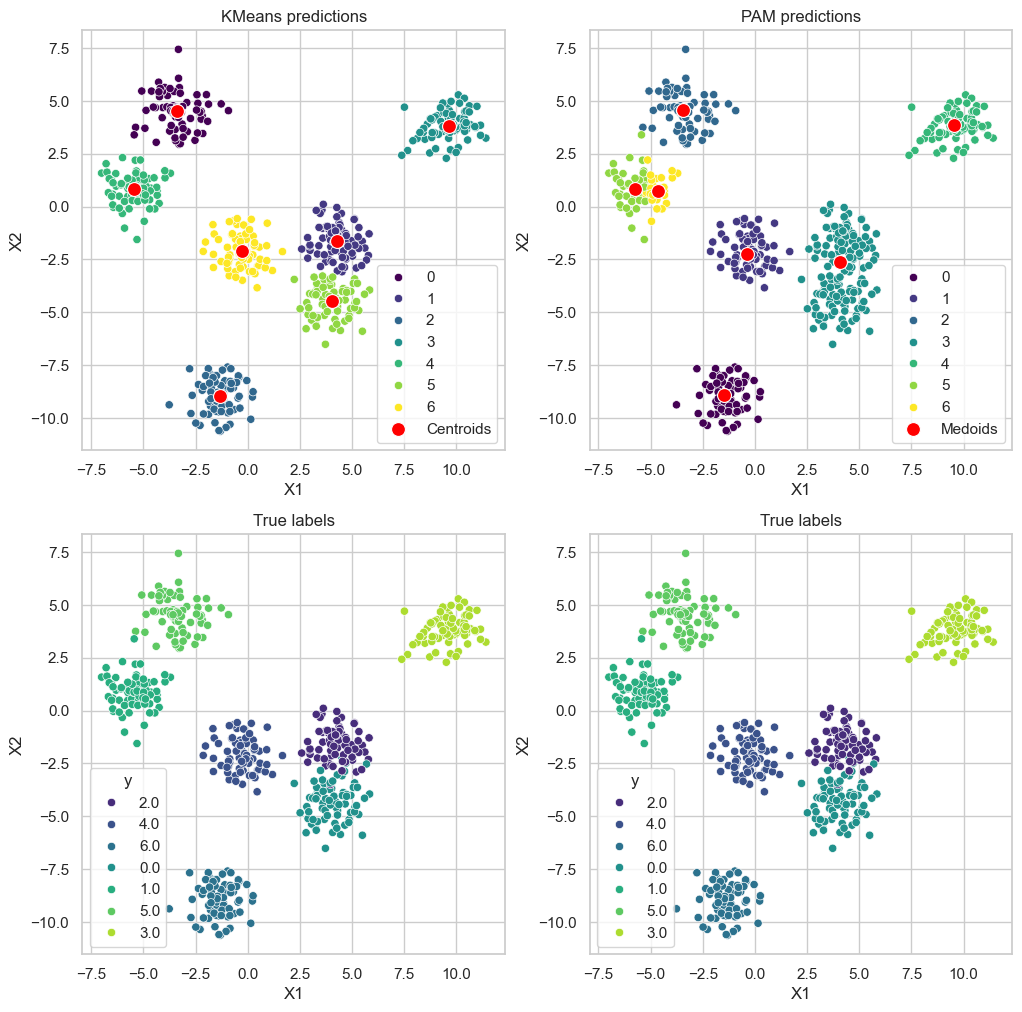

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# KMeans predictions
kmeans = KMeans(n_clusters=7, random_state=42, n_init=5).fit(my_X)
# PAM predictions
PAM = cluster_PAM(my_X.to_numpy(), k=7, n_of_runs=5)

sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=kmeans.labels_, ax=ax[0, 0], palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                ax=ax[0, 0], color='red', s=100, label='Centroids')
ax[0, 0].set_title('KMeans predictions')
ax[0, 0].set_xlabel('X1')
ax[0, 0].set_ylabel('X2')

sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=PAM[1], ax=ax[0, 1], palette='viridis')
sns.scatterplot(x=PAM[0][:, 0], y=PAM[0][:, 1],
                ax=ax[0, 1], color='red', s=100, label='Medoids')
ax[0, 1].set_title('PAM predictions')
ax[0, 1].set_xlabel('X1')
ax[0, 1].set_ylabel('X2')

# True labels
sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=my_y.astype(str), ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('True labels')
ax[1, 0].set_xlabel('X1')
ax[1, 0].set_ylabel('X2')

sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=my_y.astype(str), ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('True labels')
ax[1, 1].set_xlabel('X1')
ax[1, 1].set_ylabel('X2')

Możemy zaobserwować, że przy liczbie próbowanych punktów początkowych 5, algorytm PAM ewidentnie źle znajduje klastry. Algorytm K-średnich zadziałał lepiej, ale może to być związane z doborem punktów początkowych.

Powtórzmy eksperyment dla 20 prób.

Text(0, 0.5, 'X2')

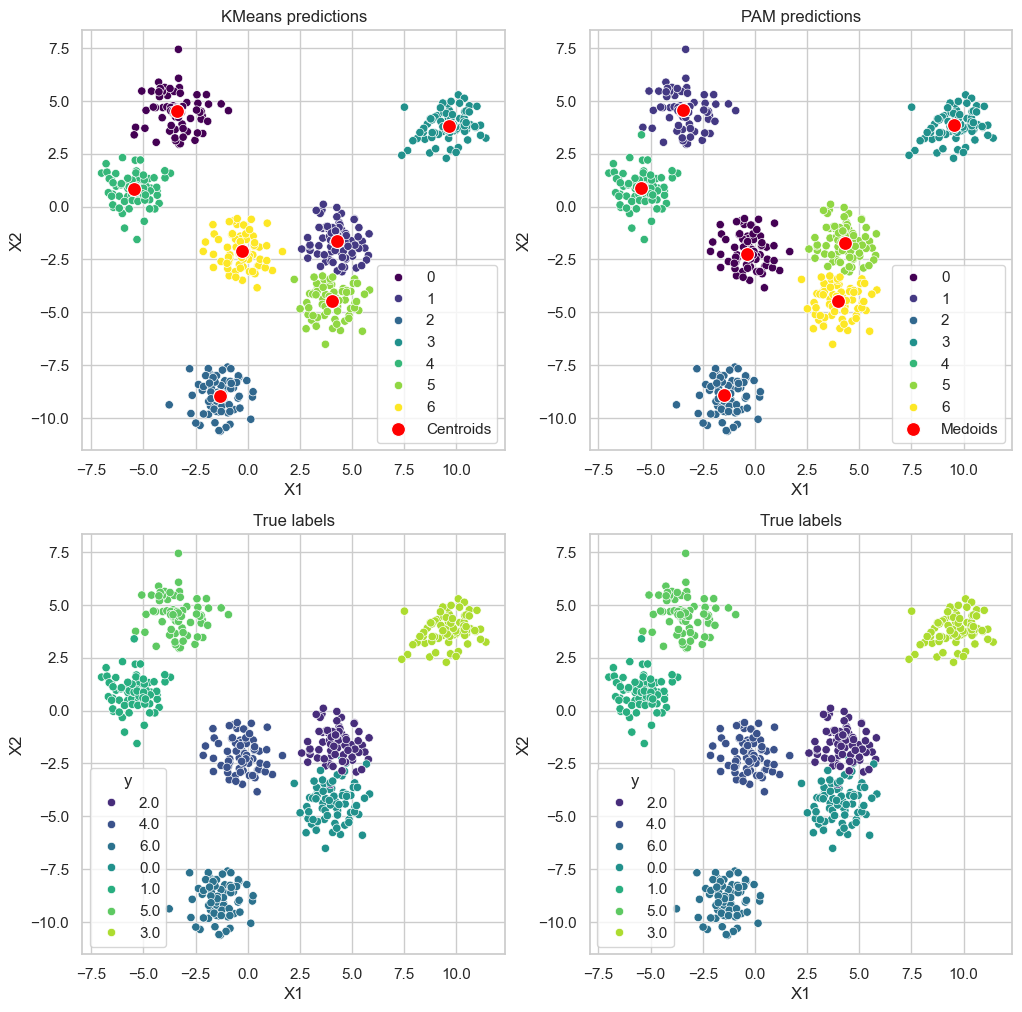

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# KMeans predictions
kmeans = KMeans(n_clusters=7, random_state=42, n_init=20).fit(my_X)
# PAM predictions
PAM = cluster_PAM(my_X.to_numpy(), k=7, n_of_runs=20)

sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=kmeans.labels_, ax=ax[0, 0], palette='viridis')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                ax=ax[0, 0], color='red', s=100, label='Centroids')
ax[0, 0].set_title('KMeans predictions')
ax[0, 0].set_xlabel('X1')
ax[0, 0].set_ylabel('X2')

sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=PAM[1], ax=ax[0, 1], palette='viridis')
sns.scatterplot(x=PAM[0][:, 0], y=PAM[0][:, 1],
                ax=ax[0, 1], color='red', s=100, label='Medoids')
ax[0, 1].set_title('PAM predictions')
ax[0, 1].set_xlabel('X1')
ax[0, 1].set_ylabel('X2')

# True labels
sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=my_y.astype(str), ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('True labels')
ax[1, 0].set_xlabel('X1')
ax[1, 0].set_ylabel('X2')

sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=my_y.astype(str), ax=ax[1, 1], palette='viridis')
ax[1, 1].set_title('True labels')
ax[1, 1].set_xlabel('X1')
ax[1, 1].set_ylabel('X2')

Przy 20 próbach oba algorytmy działają podobnie i znajdują klastry w sposób zadowalający.

### 3.2. Test optymalnego parametru k

Dla obu zbiórów danych policzymy SSE (Sum of Squared Errors) dla różnych wartości k. Optymalne k powinno być widoczne na wykresie jako punkt przegięcia.

#### 3.2.1. Zbiór danych z zadania

In [8]:
sse = pd.DataFrame(columns=['k', 'KMeans_SSE', 'PAM_SSE'])

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20).fit(X)
    kmeans_labels = kmeans.labels_
    kmeans_centers = kmeans.cluster_centers_
    PAM_centers, PAM_labels = cluster_PAM(X.to_numpy(), k=k, n_of_runs=20)
    
    # Calculate SSE
    KMeans_SSE = 0
    PAM_SSE = 0
    for i in range(k):
        KMeans_SSE += np.sum(np.sum((X[kmeans_labels == i] - kmeans_centers[i])**2, axis=1), axis=0)
        PAM_SSE += np.sum(np.sum((X[PAM_labels == i] - PAM_centers[i])**2, axis=1), axis=0)
        
    sse = pd.concat([sse, pd.DataFrame([[k, KMeans_SSE, PAM_SSE]], columns=['k', 'KMeans_SSE', 'PAM_SSE'])])

sse.reset_index(inplace=True, drop=True)
sse

,k,KMeans_SSE,PAM_SSE
0,2,2510.738744,2535.683727
1,3,1335.359495,1359.169728
2,4,1082.223098,1161.384296
3,5,878.959681,919.961668
4,6,745.944813,778.025727
5,7,614.521529,638.090724
6,8,530.941056,554.822847
7,9,451.237480,479.017488
8,10,395.285053,435.066137


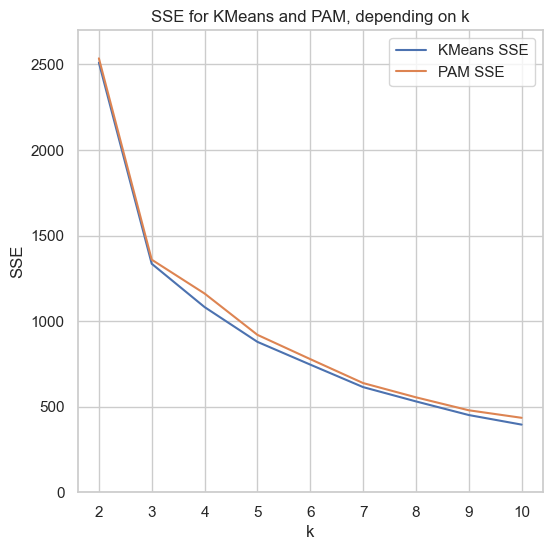

In [9]:
plt.figure(figsize=(6, 6))

sns.lineplot(x=sse['k'], y=sse['KMeans_SSE'], label='KMeans SSE')
sns.lineplot(x=sse['k'], y=sse['PAM_SSE'], label='PAM SSE')
plt.title('SSE for KMeans and PAM, depending on k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.ylim(0, 2700)
plt.show()

Patrząc na wykres, możemy zauważyć, że najbardziej wyraźny punkt przegięcia jest dla k = 3. Wartość ta zgadza się z wartością k z zadania.

#### 3.2.2. Wygenerowany zbiór danych

In [10]:
sse = pd.DataFrame(columns=['k', 'KMeans_SSE', 'PAM_SSE'])

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20).fit(my_X)
    kmeans_labels = kmeans.labels_
    kmeans_centers = kmeans.cluster_centers_
    PAM_centers, PAM_labels = cluster_PAM(my_X.to_numpy(), k=k, n_of_runs=20)
    
    # Calculate SSE
    KMeans_SSE = 0
    PAM_SSE = 0
    for i in range(k):
        KMeans_SSE += np.sum(np.sum((my_X[kmeans_labels == i] - kmeans_centers[i])**2, axis=1), axis=0)
        PAM_SSE += np.sum(np.sum((my_X[PAM_labels == i] - PAM_centers[i])**2, axis=1), axis=0)
        
    sse = pd.concat([sse, pd.DataFrame([[k, KMeans_SSE, PAM_SSE]], columns=['k', 'KMeans_SSE', 'PAM_SSE'])])

sse.reset_index(inplace=True, drop=True)
sse

,k,KMeans_SSE,PAM_SSE
0,2,12565.270962,13240.290759
1,3,5470.109398,5749.664063
2,4,2515.201341,2769.556430
3,5,1540.179183,1577.207824
4,6,900.713743,920.897184
5,7,608.813277,615.552505
6,8,567.165524,584.147126
7,9,530.357232,546.724715
8,10,492.539922,523.752145


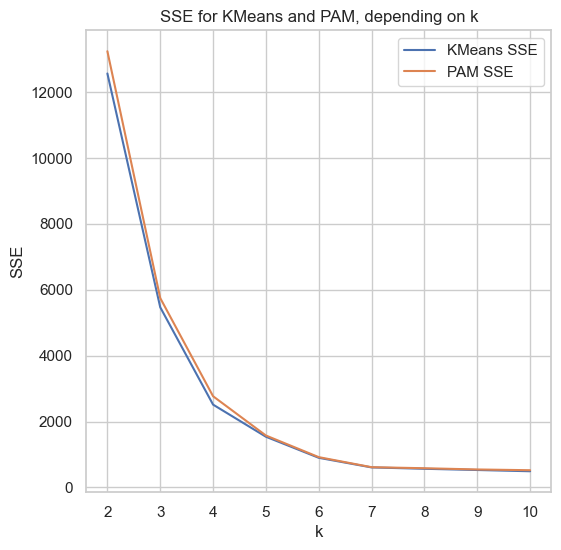

In [11]:
plt.figure(figsize=(6, 6))

sns.lineplot(x=sse['k'], y=sse['KMeans_SSE'], label='KMeans SSE')
sns.lineplot(x=sse['k'], y=sse['PAM_SSE'], label='PAM SSE')
plt.title('SSE for KMeans and PAM, depending on k')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

Na wykresie widzimy, że dla k>=7 SSE się stabilizuje, co sugeruje, że optymalne k to 7, natomiast jeśli chcielibyśmy sugerować się punktem przegięcia, to najbardziej optymalne k nie jest jednoznaczne. Na podstawie punktu przegięcia, nie znając prawdziwej liczby klastrów, możemy wybrać k równe 3, 4, 5, 6, lub 7.

Sprawdźmy jak wygląda klasteryzacja dla k równego 3, 4, 5, 6 i czy rzeczywiście ma ona sens. Skupimy się na algorytmie PAM.

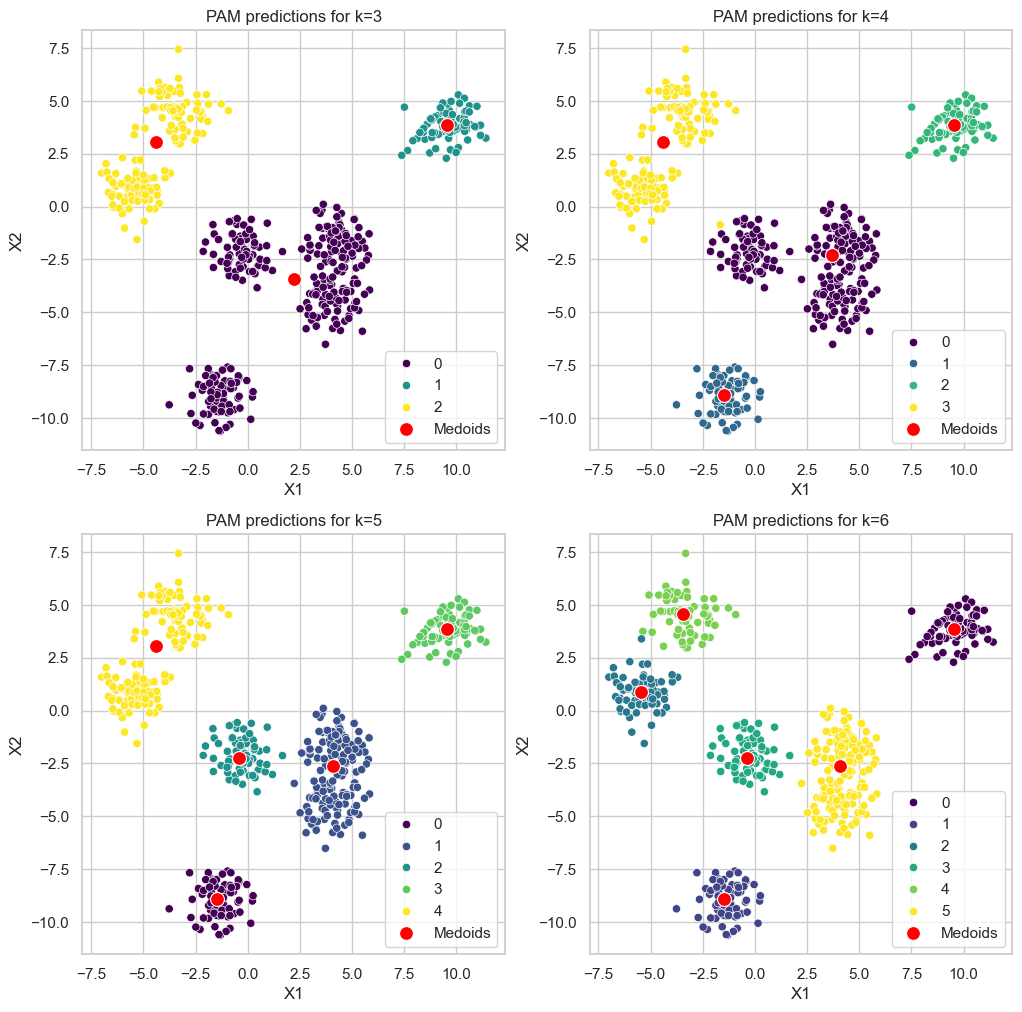

In [12]:
plt.subplots(2, 2, figsize=(12, 12))

for k in range(3, 7):
    PAM_centers, PAM_labels = cluster_PAM(my_X.to_numpy(), k=k, n_of_runs=20)
    
    plt.subplot(2, 2, k-2)
    sns.scatterplot(x=my_X['X1'], y=my_X['X2'], hue=PAM_labels, palette='viridis')
    sns.scatterplot(x=PAM_centers[:, 0], y=PAM_centers[:, 1],
                    color='red', s=100, label='Medoids')
    plt.title(f'PAM predictions for k={k}')
    plt.xlabel('X1')
    plt.ylabel('X2')

plt.show()

Jak widzimy, pomimo że oryginalnie zbiór danych miał 7 klastrów, to dla k=3, 4, 5, 6 algorytm PAM także znajduje klastry, które mają sens.